In [7]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

In [27]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)
data1=data.copy()
headers=list(data.columns)
# Display the first few rows of the dataframe
data.head()


import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_=data.iloc[:,:-1]
minmax.fit(data_)
data = pd.DataFrame(minmax.transform(data_),columns=headers[:-1])
data['increase_stock']=data1['increase_stock']
data.head()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,0.217391,0.833333,0.000000,0.0,0.0,0.0,0.042506,0.079625,0.450143,0.0,0.0,0.0,0.372146,0.316,1.0,low_bike_demand
1,0.913043,0.666667,0.000000,0.0,1.0,0.0,0.174497,0.131148,0.298905,0.0,0.0,0.0,0.545662,0.857,1.0,low_bike_demand
2,0.913043,0.500000,0.636364,0.0,1.0,1.0,0.805369,0.941452,0.684674,0.0,0.0,0.0,0.000000,0.811,1.0,low_bike_demand
3,0.043478,1.000000,0.000000,0.0,0.0,0.0,0.272931,0.337237,0.522251,0.0,0.0,0.0,0.438356,0.000,1.0,low_bike_demand
4,0.739130,0.000000,0.181818,0.0,1.0,0.0,0.465324,0.163934,0.034031,0.0,0.0,0.0,0.239726,0.446,1.0,low_bike_demand


# High demand
The histograms shows the number of observed instances of high demand, given some variable in the x-axis.

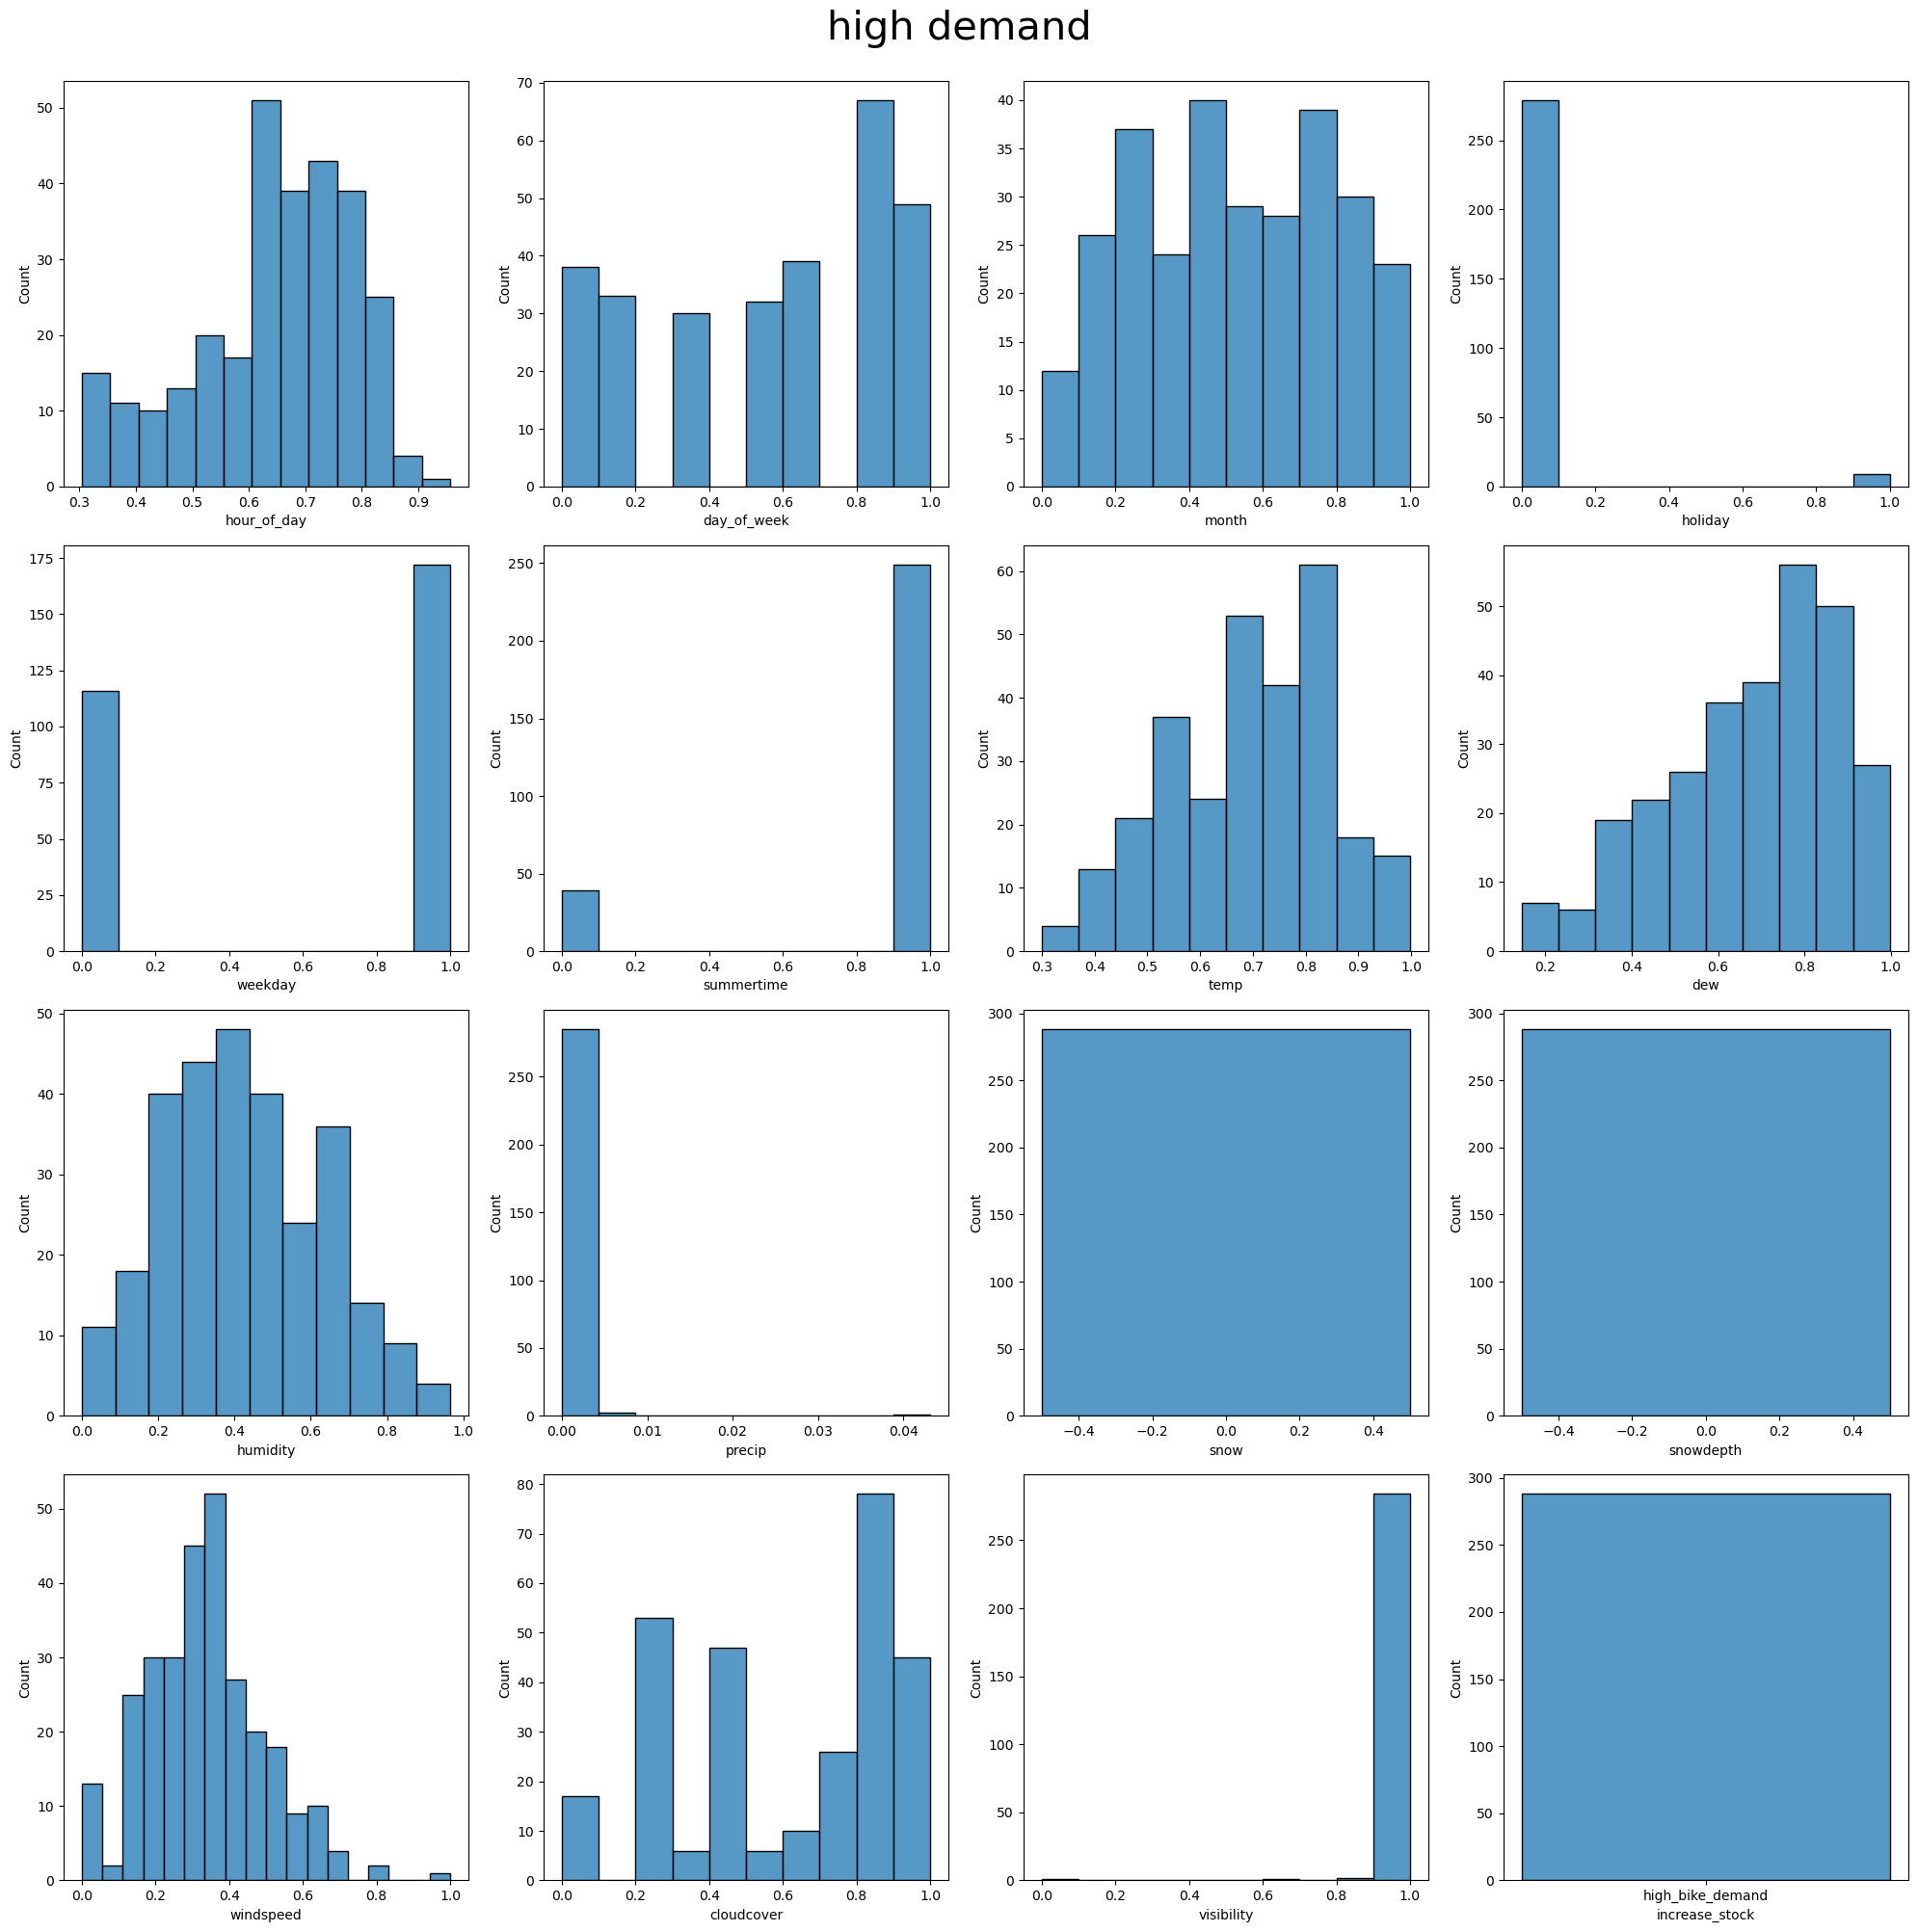

In [31]:
# Filtering the data for only high bike demand (binary label = 1)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

high_demand_data = data[data['increase_stock_binary']  == 1]

# Plotting the distribution of each feature for high bike demand
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("high demand", y=1, fontsize=30)
for i, col in enumerate(high_demand_data.columns[:-1]): # excluding the last two columns (original and binary labels)
    sns.histplot(high_demand_data[col], bins="auto", ax=axes[i], kde=False) 

plt.tight_layout()
plt.show()



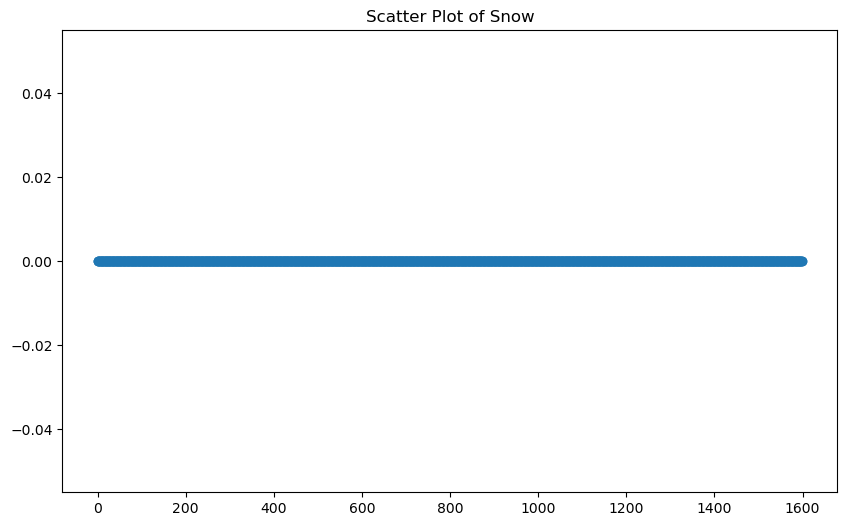

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: snow, dtype: int64


In [41]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data1['snow'])), data1['snow'])
plt.title('Scatter Plot of Snow')
plt.show()
print(data1['snow'][:10])

# Low demand
The histograms shows the number of observed instances of low demand, given some variable in the x-axis.

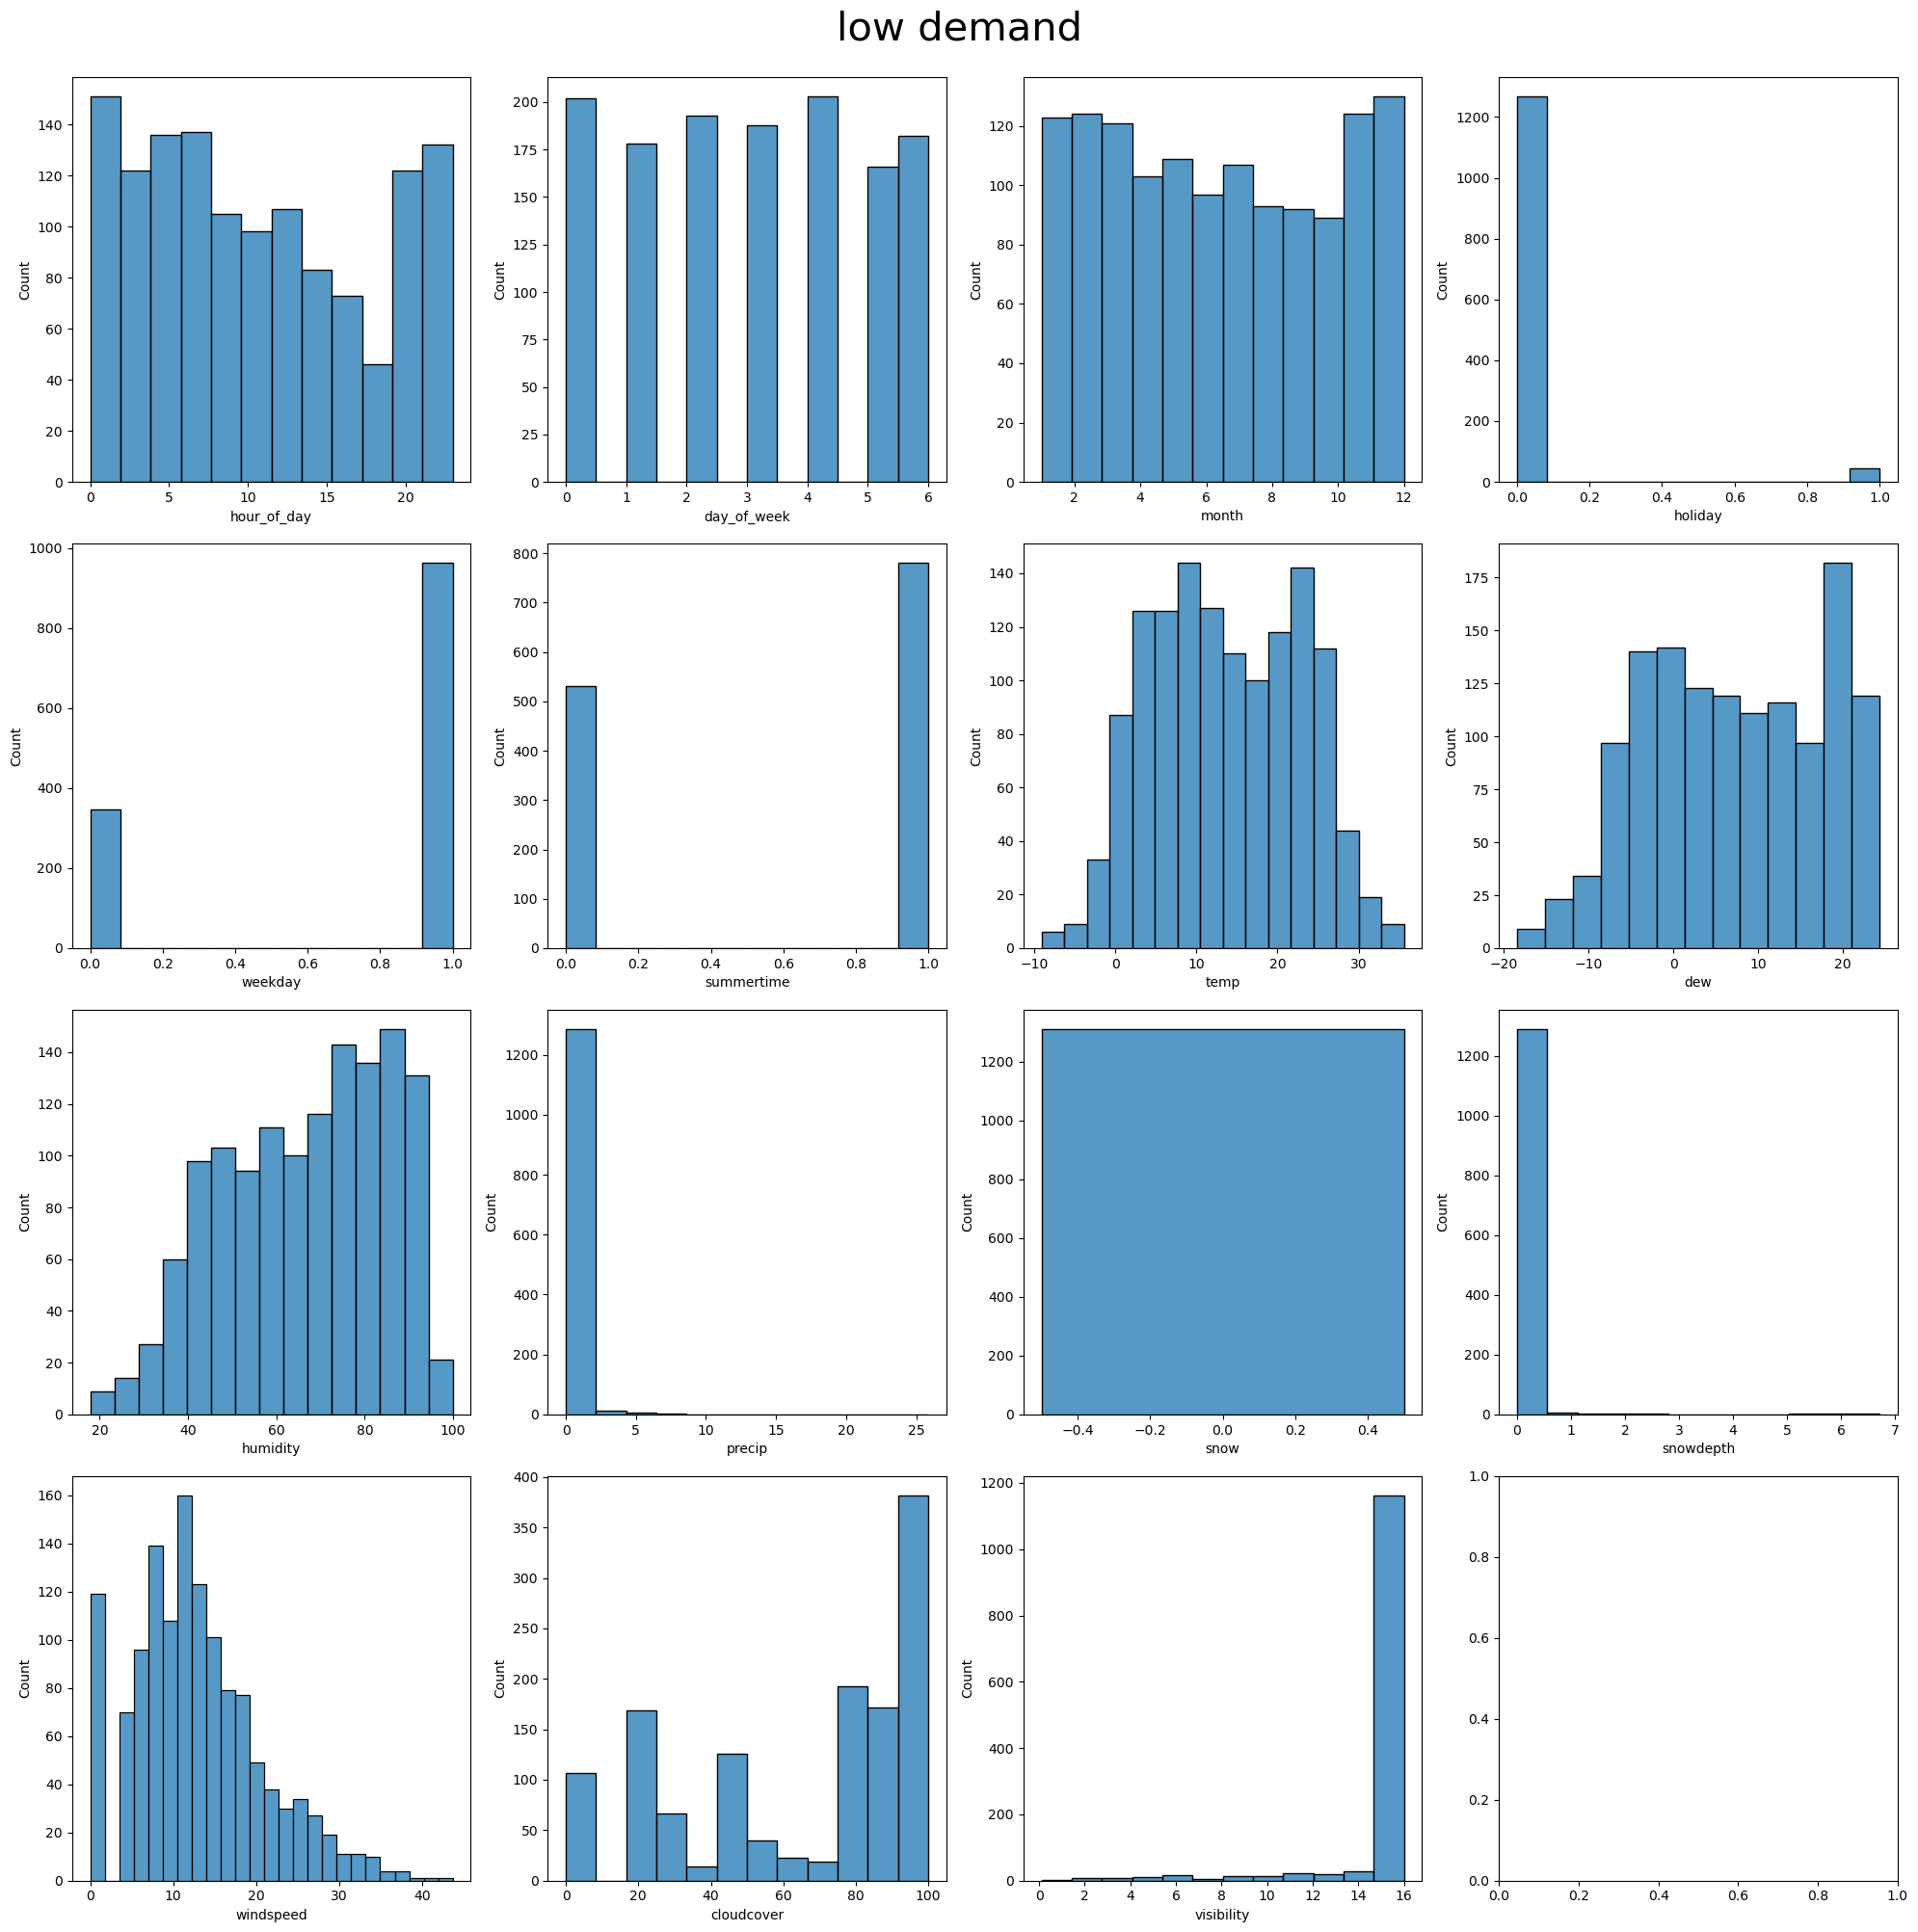

In [12]:
low_demand_data = data[data['increase_stock_binary'] == 0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("low demand", y=1, fontsize=30)
for i, col in enumerate(low_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(low_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Plotting low and high demand together
1 = high demand \
0 = low demand

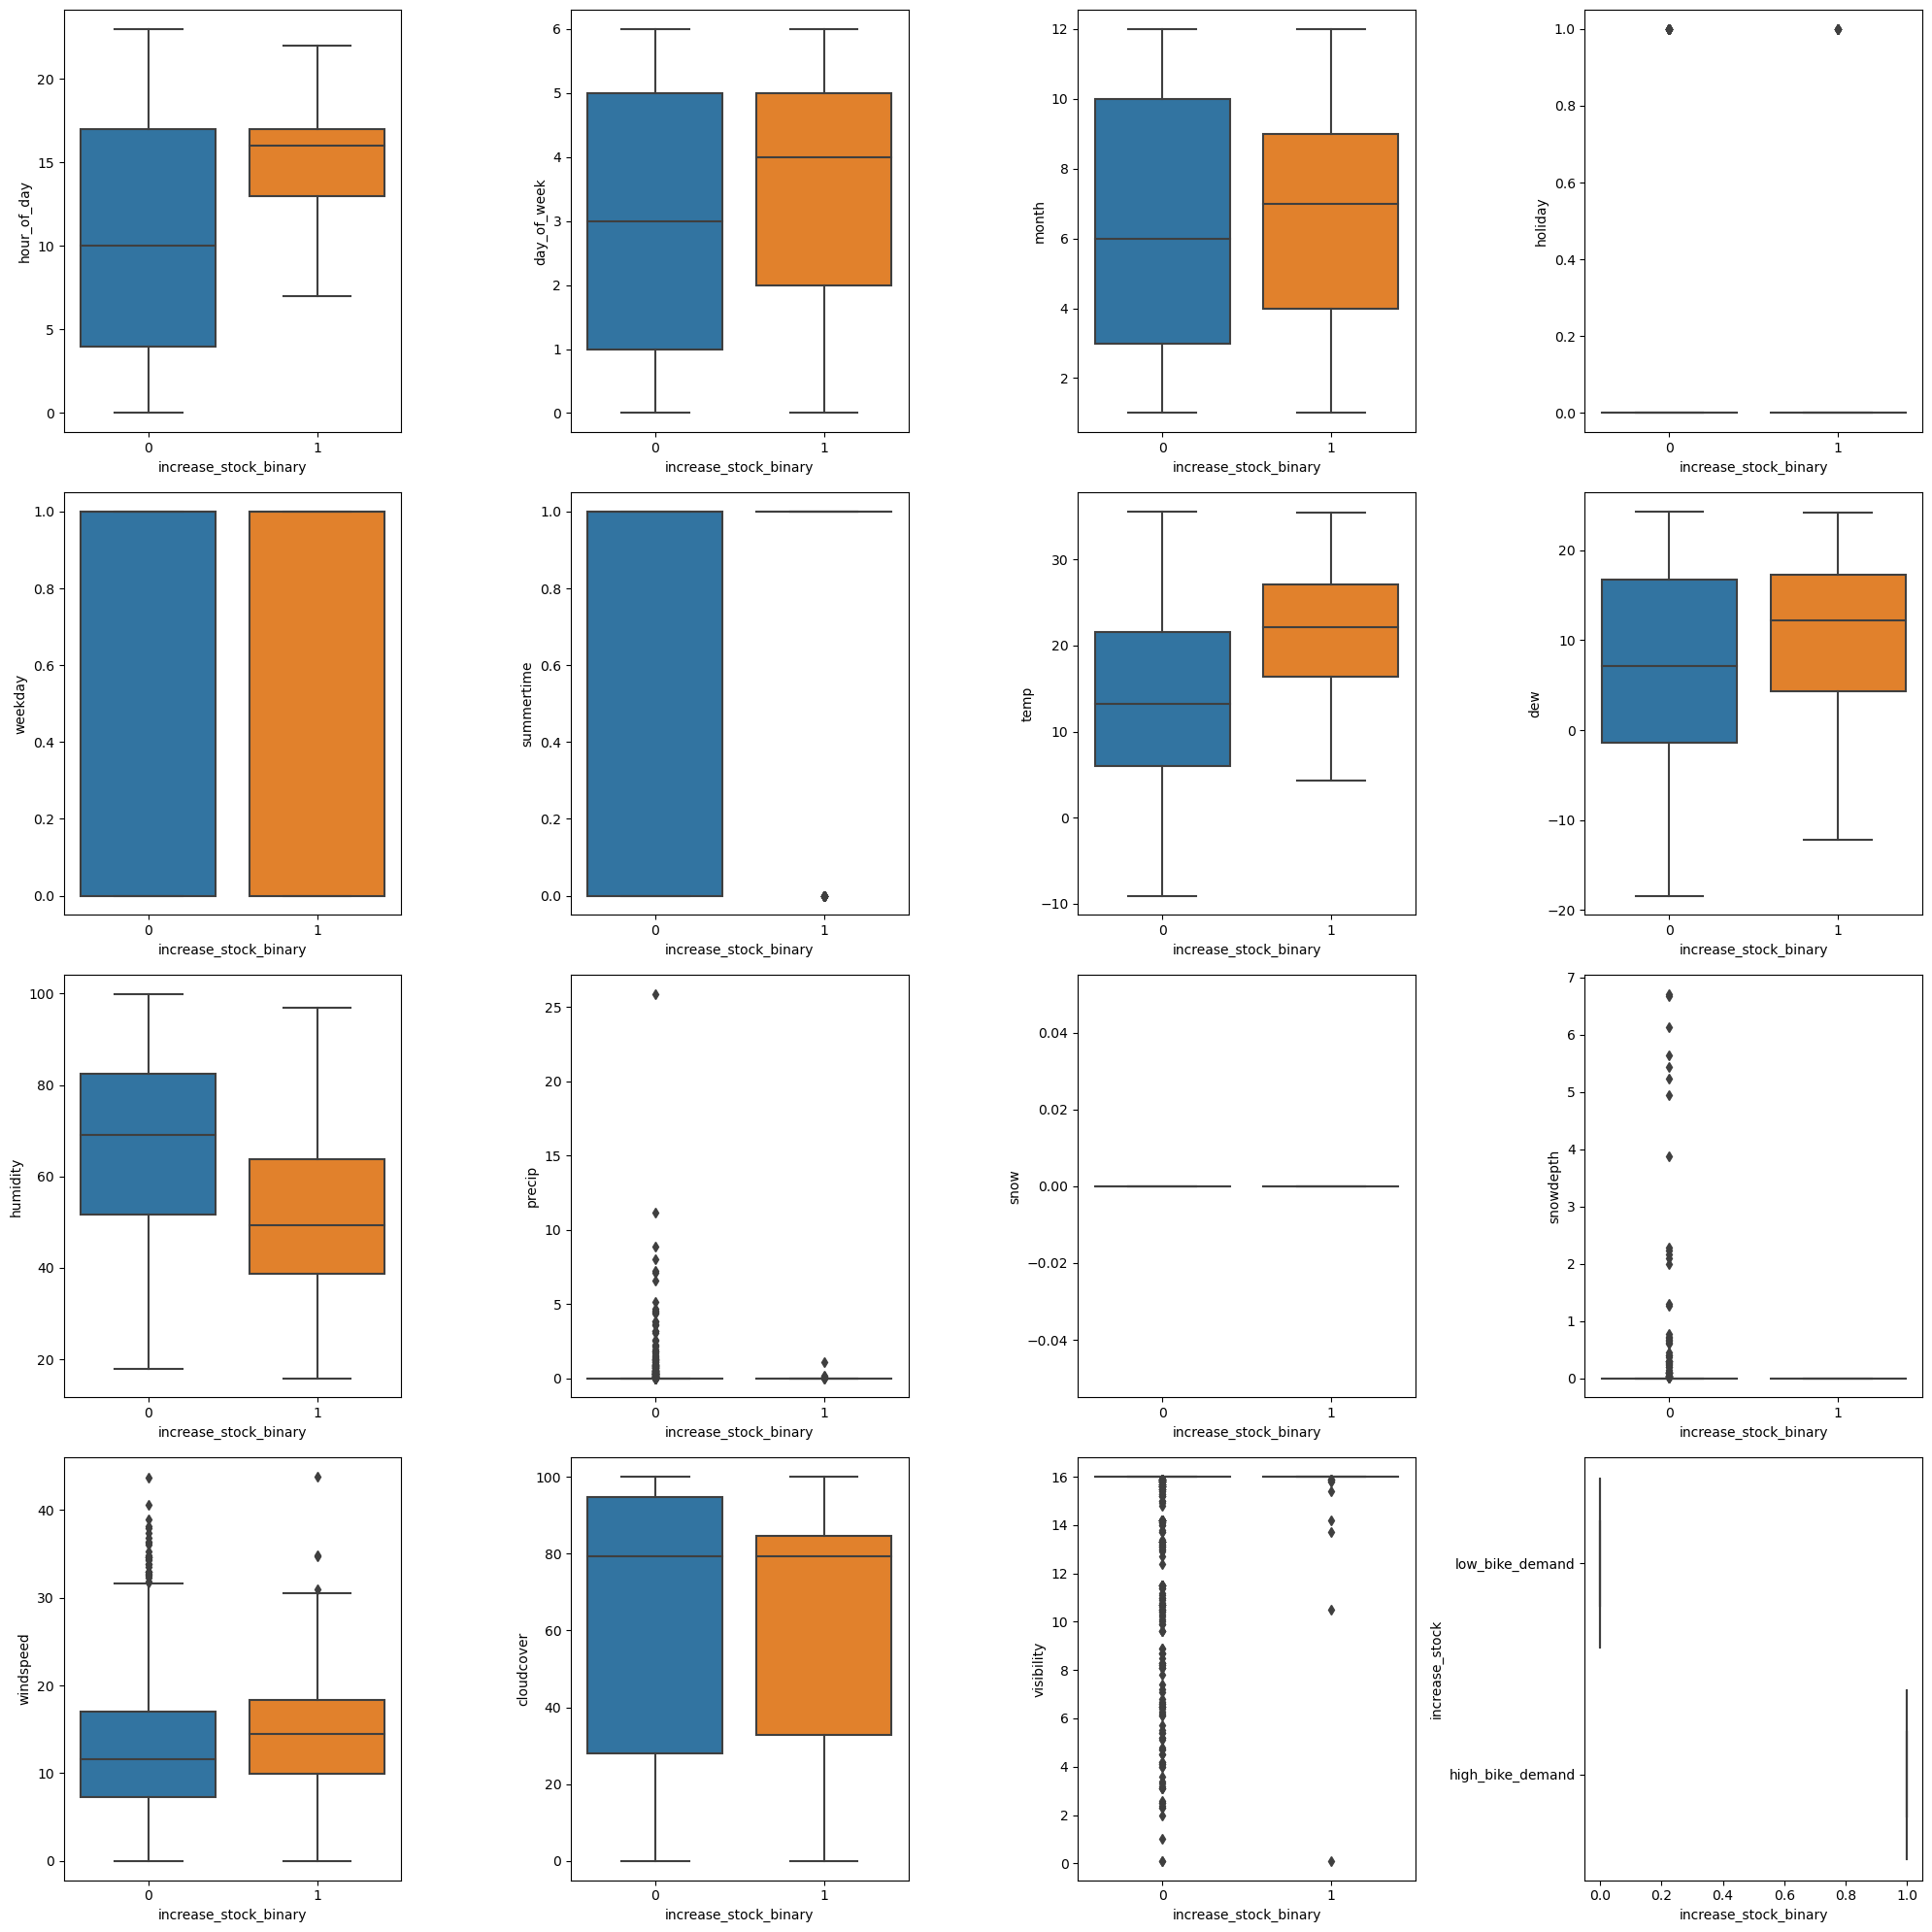

In [10]:
# Convert the 'increase_stock' column to binary for plotting, 
# data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Plotting correlations between inputs and the binary label
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is the binary label
    sns.boxplot(x='increase_stock_binary', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## Observations
1. The increase for demand ishighest in the interval 15:00 - 19:00.
2. Friday is a high demand day.
3. The months has some influence. 
4. Demand is very high when it is not , but slightly higher 
5. 

In [ ]:
model = AdaBoostClassifier(random_state=0)


from sklearn.model_selection import KFold
kf = KFold(5, True, 0)

for train_index, test_index in kf.split(X):
    print('trainset:{}'.format(train_index))
    print('testset:{}'.format(test_index))

model.fit()
model.predict([[5,5]])